# Image Classification using CNN

Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

Download and unzip the file

In [2]:
!wget https://www.dropbox.com/s/vnner331d5l9g6r/train.zip
!wget https://www.dropbox.com/s/7nuzz0udk35gbio/test.zip

!unzip /content/train.zip
!unzip /content/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

Create Folder and Seperate the images into different class

In [3]:
TRAIN_DIR = "./DATASET"
ORG_DIR = "/content/train"
CLASS = ['cat','dog']

for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  if not os.path.exists( DEST ):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR , C)+"*"):
    SRC = img_path

    shutil.copy(SRC, DEST)

Check the image folder

In [4]:
os.listdir("/content/DATASET/cat")
os.listdir("/content/DATASET/dog")
os.listdir("/content/test")

['1325.jpg',
 '9945.jpg',
 '3635.jpg',
 '9925.jpg',
 '4876.jpg',
 '5838.jpg',
 '5058.jpg',
 '1726.jpg',
 '12180.jpg',
 '3000.jpg',
 '5656.jpg',
 '4063.jpg',
 '9746.jpg',
 '1278.jpg',
 '4133.jpg',
 '11846.jpg',
 '11077.jpg',
 '1233.jpg',
 '2255.jpg',
 '9318.jpg',
 '2408.jpg',
 '1808.jpg',
 '4979.jpg',
 '512.jpg',
 '3961.jpg',
 '5335.jpg',
 '6783.jpg',
 '8408.jpg',
 '10482.jpg',
 '10245.jpg',
 '5008.jpg',
 '6627.jpg',
 '6443.jpg',
 '11347.jpg',
 '9457.jpg',
 '11289.jpg',
 '4089.jpg',
 '12159.jpg',
 '3590.jpg',
 '5351.jpg',
 '5728.jpg',
 '3966.jpg',
 '9316.jpg',
 '2008.jpg',
 '1331.jpg',
 '10538.jpg',
 '12136.jpg',
 '10130.jpg',
 '11517.jpg',
 '4360.jpg',
 '3455.jpg',
 '5607.jpg',
 '7331.jpg',
 '8628.jpg',
 '4180.jpg',
 '4936.jpg',
 '7783.jpg',
 '6033.jpg',
 '6416.jpg',
 '1492.jpg',
 '10027.jpg',
 '3362.jpg',
 '9997.jpg',
 '1170.jpg',
 '9684.jpg',
 '5395.jpg',
 '2285.jpg',
 '10929.jpg',
 '4747.jpg',
 '6334.jpg',
 '10613.jpg',
 '8848.jpg',
 '6440.jpg',
 '6307.jpg',
 '649.jpg',
 '7161.jpg',

#Building a Model

In [5]:
# Additional Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dense Layer
from keras.layers import Dense, Flatten
# Functional API
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
import keras

Initialize Base Model

In [6]:
base_model = InceptionV3(input_shape=(256,256,3), include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [7]:
for layer in base_model.layers:
  layer.trainable = False

In [8]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X)

# Final Model
model = Model(base_model.input, X)

# Compile the model
model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

#Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Pre Processing Data using Data Generator

In [9]:
train_datagen = ImageDataGenerator(featurewise_center= True, 
                                   rotation_range=0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip= True, 
                                   preprocessing_function= preprocess_input, 
                                   zoom_range=0.4, 
                                   shear_range=0.4)

train_data = train_datagen.flow_from_directory(directory="/content/DATASET", 
                                               target_size=(256,256), 
                                               batch_size= 64)


Found 25000 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [11]:
t_img , label = train_data.next()
t_img.shape

(64, 256, 256, 3)

Image Samples

In [12]:
def plotImages(img_arr , label):

  for idx , img in enumerate( img_arr ):
    if idx <= 10 :
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


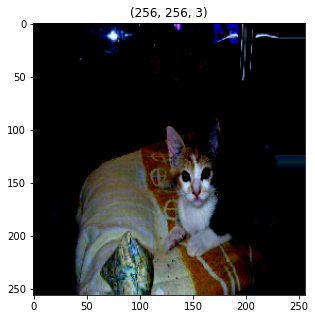

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


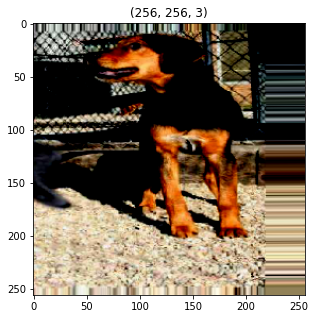

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


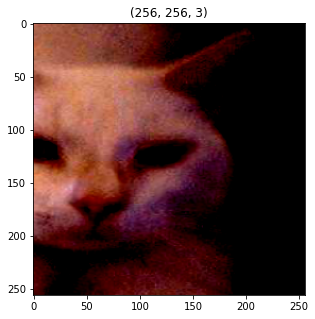

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


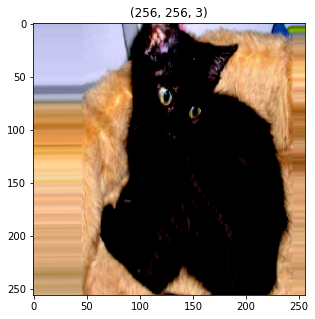

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


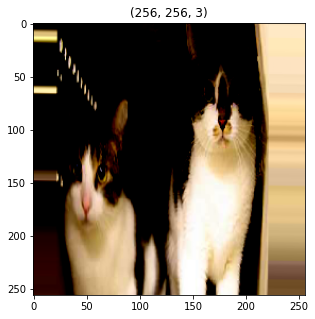

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


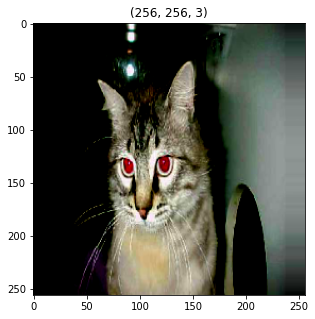

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


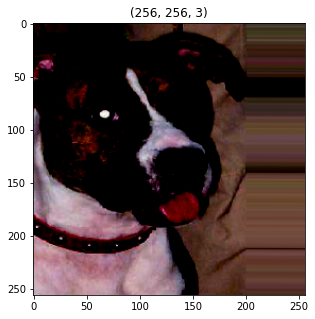

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


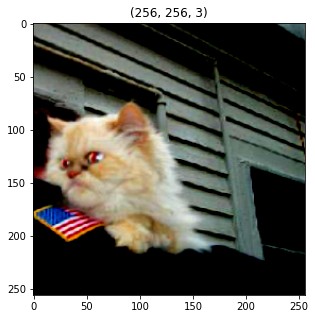

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


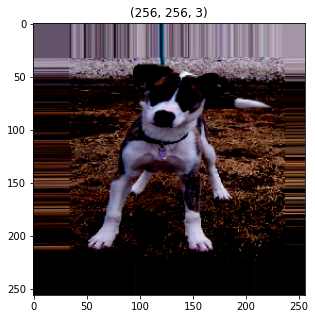

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


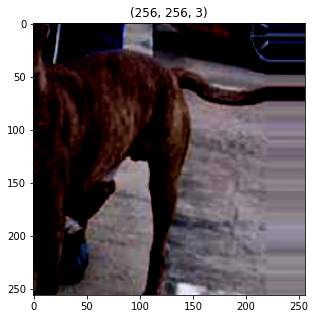

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


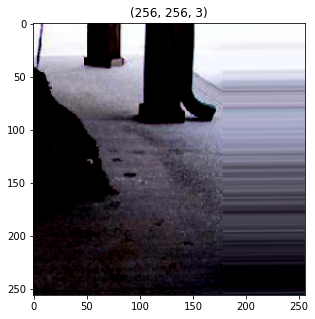

In [13]:
plotImages(t_img, label)

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="./best_model.h5", 
                     monitor="accuracy", 
                     verbose=1, 
                     save_best_only= True)

es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience= 5, verbose= 1)

cb = [mc,es]

In [15]:
his = model.fit_generator(train_data, steps_per_epoch= 10, epochs=30, callbacks= cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.9778 - accuracy: 0.8188
Epoch 1: accuracy improved from -inf to 0.81875, saving model to ./best_model.h5
10/10 [==============================] - 25s 954ms/step - loss: 0.9778 - accuracy: 0.8188
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9734
Epoch 2: accuracy improved from 0.81875 to 0.97344, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.1925 - accuracy: 0.9734
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1855 - accuracy: 0.9688
Epoch 3: accuracy did not improve from 0.97344
10/10 [==============================] - 11s 1s/step - loss: 0.1855 - accuracy: 0.9688
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0744 - accuracy: 0.9922
Epoch 4: accuracy improved from 0.97344 to 0.99219, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.0

Loss vs Accracy Plot of the Best Model

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

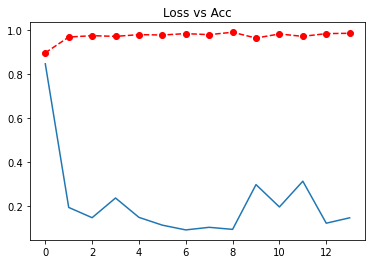

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'], 'go--' , c ="red")

plt.title("Loss vs Acc")
plt.show()

# Detect the image using train model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


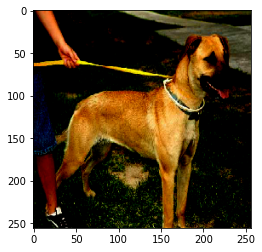

In [16]:
path = "/content/test/1003.jpg"
img = load_img(path, target_size=(256,256))

i = img_to_array(img)
i =preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("Cat")
else:
  print("Dog")

plt.imshow(input_arr[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


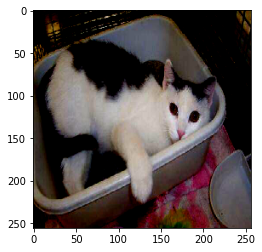

In [17]:
path = "/content/test/11003.jpg"
img = load_img(path, target_size=(256,256))

i = img_to_array(img)
i =preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("Cat")
else:
  print("Dog")

plt.imshow(input_arr[0])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


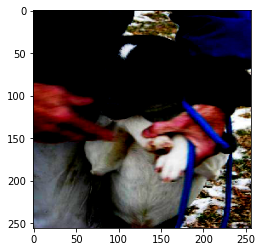

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


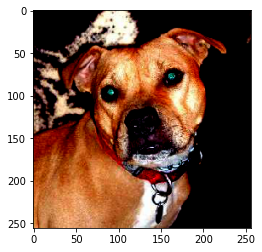

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


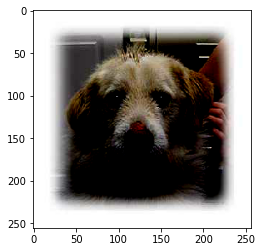

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dog


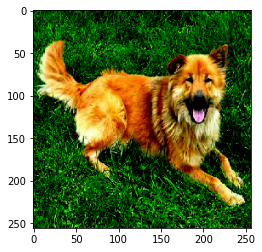

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


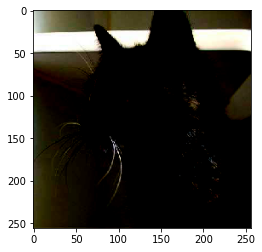

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


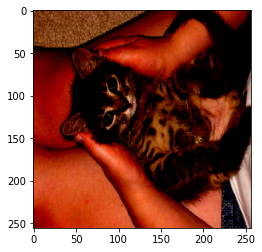

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


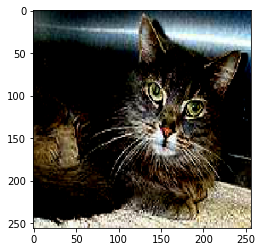

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


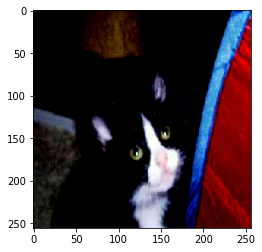

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


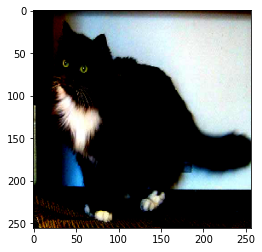

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cat


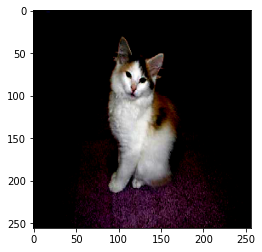

In [18]:
for in_no in range(1, 11):
  in_n = str(in_no)
  path = "/content/test/"+in_n+".jpg"
  img = load_img(path, target_size=(256,256))

  i = img_to_array(img)
  i =preprocess_input(i)

  input_arr = np.array([i])
  input_arr.shape

  pred = np.argmax(model.predict(input_arr))

  if pred == 0:
    print("Cat")
  else:
    print("Dog")

  plt.imshow(input_arr[0])
  plt.show()